## Class VS Sample Count Plot

In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import numpy as np
import random
import cv2

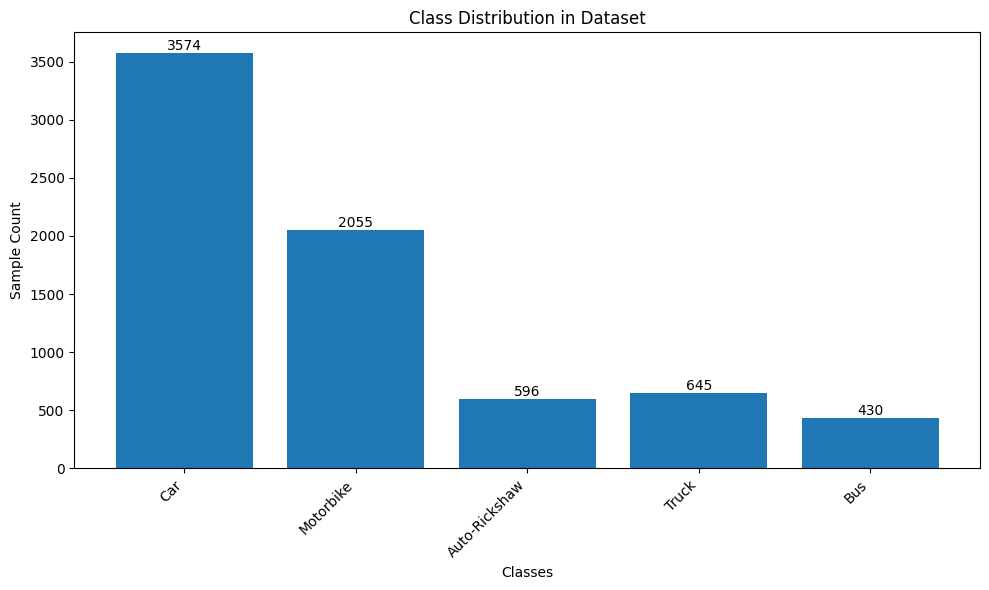


Class Distribution Statistics:
Car: 3574 samples
Motorbike: 2055 samples
Auto-Rickshaw: 596 samples
Truck: 645 samples
Bus: 430 samples
Total samples: 7300


In [2]:

annotation_dir = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"
class_file = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj.names"

with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

class_counts = Counter()

for filename in os.listdir(annotation_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(annotation_dir, filename)
        with open(file_path, 'r') as f:
            for line in f:
        
                class_id = int(line.split()[0])
                class_counts[class_id] += 1

class_indices = list(class_counts.keys())
counts = list(class_counts.values())
class_labels = [class_names[i] for i in class_indices]

plt.figure(figsize=(10, 6))
plt.bar(class_labels, counts)
plt.xlabel('Classes')
plt.ylabel('Sample Count')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('class_distribution.png')
plt.show()

print("\nClass Distribution Statistics:")
for class_name, count in zip(class_labels, counts):
    print(f"{class_name}: {count} samples")
print(f"Total samples: {sum(counts)}")

## Bounding Box Size Distribution

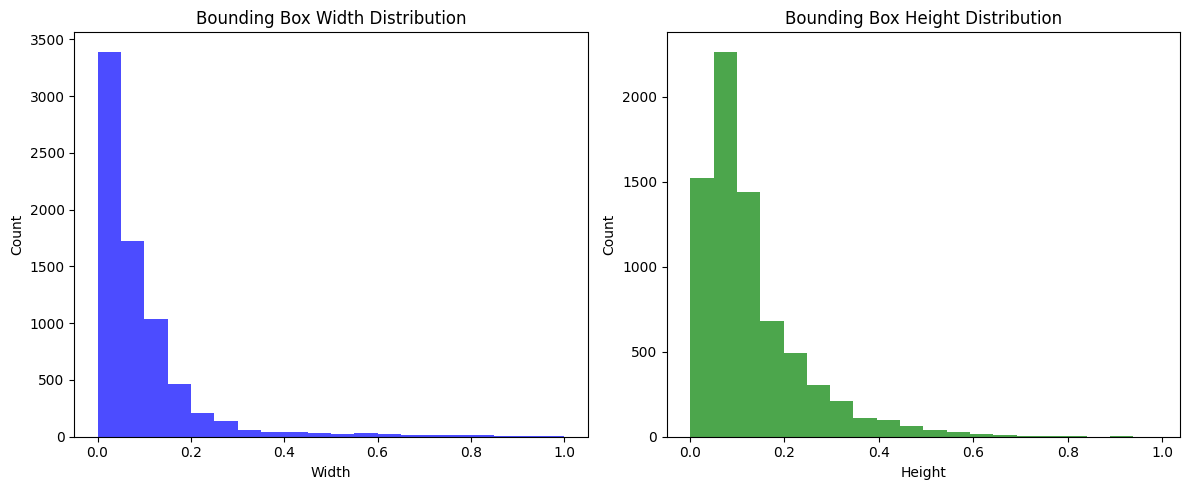

Width Stats:
Mean: 0.0946, Std: 0.1172, Min: 0.0004, Max: 1.0000
Height Stats:
Mean: 0.1294, Std: 0.1108, Min: 0.0006, Max: 0.9880


In [4]:

annotation_dir = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"

widths = []
heights = []

for filename in os.listdir(annotation_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_dir, filename), 'r') as f:
            for line in f:
                _, x_center, y_center, width, height = map(float, line.split())
                widths.append(width)
                heights.append(height)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Bounding Box Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', alpha=0.7)
plt.title('Bounding Box Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('bbox_size_distribution.png')
plt.show()

print("Width Stats:")
print(f"Mean: {np.mean(widths):.4f}, Std: {np.std(widths):.4f}, Min: {min(widths):.4f}, Max: {max(widths):.4f}")
print("Height Stats:")
print(f"Mean: {np.mean(heights):.4f}, Std: {np.std(heights):.4f}, Min: {min(heights):.4f}, Max: {max(heights):.4f}")

* On average, the width of bounding boxes is about 9.46% of the image width. This suggests that objects in dataset are generally small relative to the image width.
* The standard deviation measures variability. A value of 11.72% indicates moderate variation in bounding box widths. Some boxes are much wider or narrower than the mean, but most fall within roughly ±11.72% of the mean (0.0946 ± 0.1172), i.e., between -0.0226 and 0.2118 (though negative values are truncated to 0).
* The smallest bounding box height is 0.06% of the image height—again, very small, possibly indicating tiny objects or annotation issues.
* The largest bounding box height is 98.8% of the image height, meaning at least one object nearly spans the full vertical extent of an image.

## Aspect Ratio Analysis

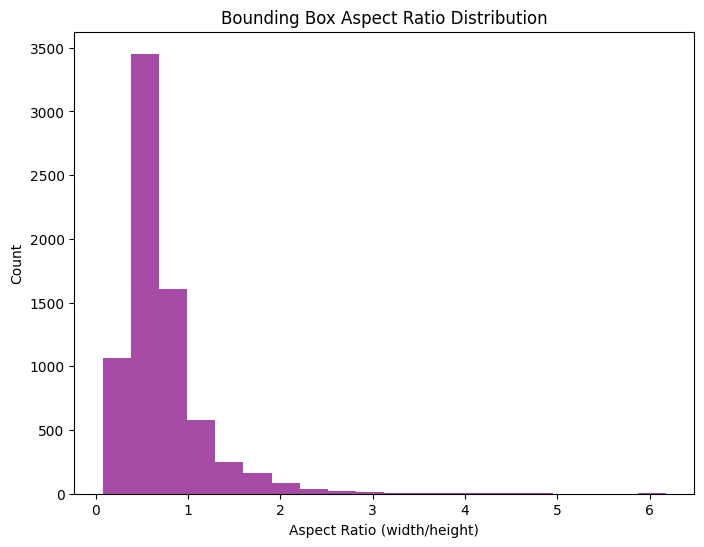

Aspect Ratio Stats:
Mean: 0.7102, Std: 0.4455, Min: 0.0727, Max: 6.1794


In [5]:
annotation_dir = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"

aspect_ratios = []

for filename in os.listdir(annotation_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_dir, filename), 'r') as f:
            for line in f:
                _, _, _, width, height = map(float, line.split())
                aspect_ratios.append(width / height)

plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=20, color='purple', alpha=0.7)
plt.title('Bounding Box Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Count')
plt.savefig('aspect_ratio_distribution.png')
plt.show()

print("Aspect Ratio Stats:")
print(f"Mean: {np.mean(aspect_ratios):.4f}, Std: {np.std(aspect_ratios):.4f}, Min: {min(aspect_ratios):.4f}, Max: {max(aspect_ratios):.4f}")

* On average, the aspect ratio is 0.7102, meaning the bounding boxes are, on average, taller than they are wide (width is about 71% of height). This suggests that objects in dataset tend to be vertically oriented rather than horizontally stretched.
* The standard deviation of 0.4455 indicates moderate variability in aspect ratios. Most aspect ratios fall within 0.7102 ± 0.4455, i.e., roughly 0.2647 to 1.1557 (68% of the data, assuming a normal distribution).
* The smallest aspect ratio is 0.0727, meaning the width is only 7.27% of the height. This indicates an extremely tall and narrow object.
* The largest aspect ratio is 6.1794, meaning the width is over 6 times the height. This indicates an extremely wide and short object.

## Sample Count per Image

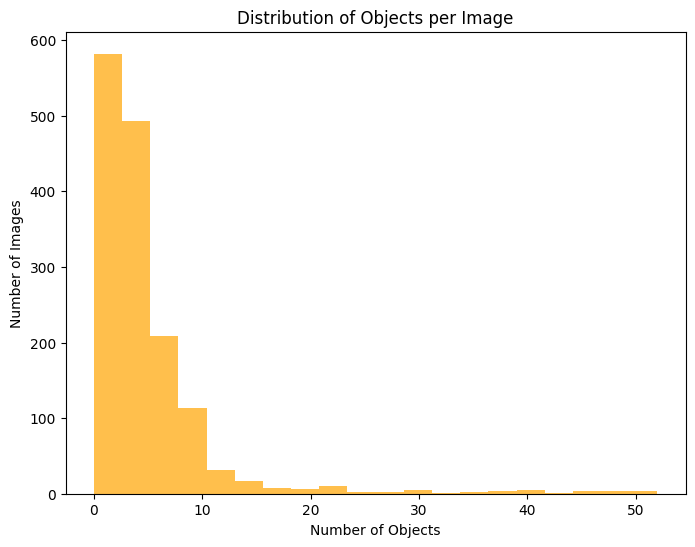

Average objects per image: 4.86
Max objects in an image: 52


In [6]:
annotation_dir = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"

objects_per_image = []

for filename in os.listdir(annotation_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_dir, filename), 'r') as f:
            objects_per_image.append(len(f.readlines()))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(objects_per_image, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Objects per Image')
plt.xlabel('Number of Objects')
plt.ylabel('Number of Images')
plt.savefig('objects_per_image.png')
plt.show()

# Print statistics
print(f"Average objects per image: {sum(objects_per_image) / len(objects_per_image):.2f}")
print(f"Max objects in an image: {max(objects_per_image)}")

## Class-wise Bounding Box Statistics

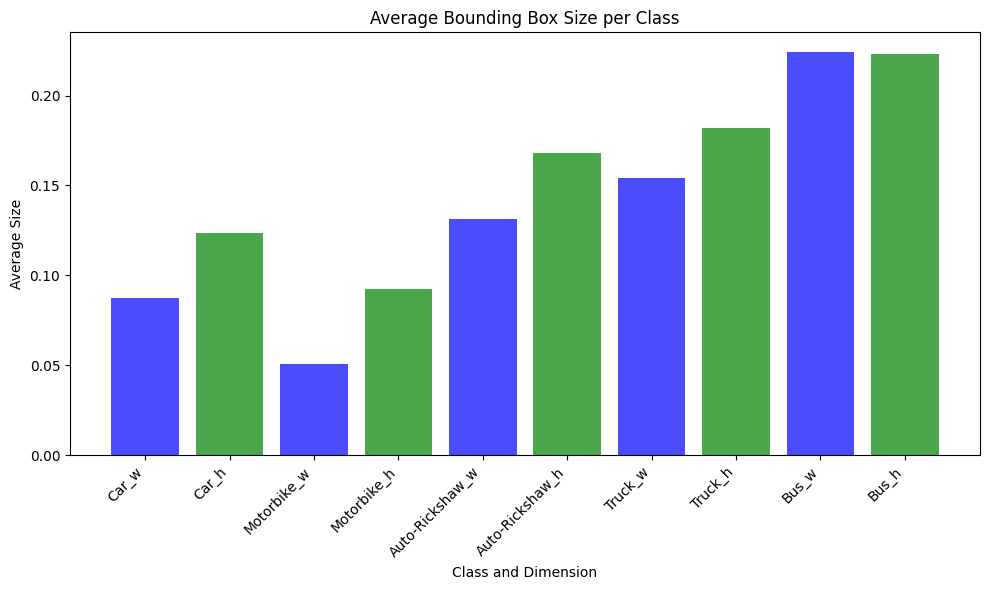

In [7]:
annotation_dir = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"
class_file = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj.names"
with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]
    
class_sizes = defaultdict(list)

for filename in os.listdir(annotation_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_dir, filename), 'r') as f:
            for line in f:
                class_id, _, _, width, height = map(float, line.split())
                class_sizes[int(class_id)].append((width, height))


avg_sizes = {class_id: (sum(w for w, _ in sizes) / len(sizes), 
                       sum(h for _, h in sizes) / len(sizes)) 
            for class_id, sizes in class_sizes.items()}

plt.figure(figsize=(10, 6))
for class_id, (avg_width, avg_height) in avg_sizes.items():
    plt.bar(f"{class_names[class_id]}_w", avg_width, color='blue', alpha=0.7)
    plt.bar(f"{class_names[class_id]}_h", avg_height, color='green', alpha=0.7)

plt.title('Average Bounding Box Size per Class')
plt.xlabel('Class and Dimension')
plt.ylabel('Average Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('class_bbox_sizes.png')
plt.show()

## Spatial Distribution of Objects

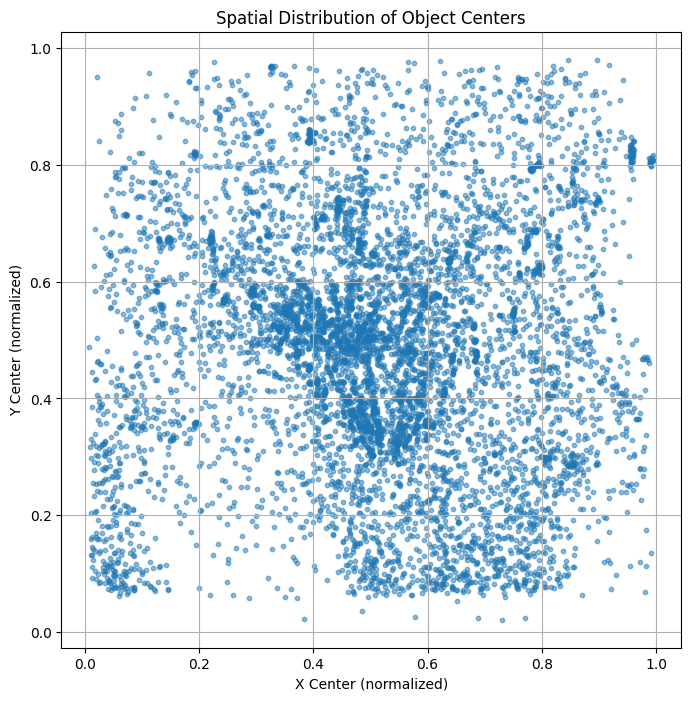

In [8]:

annotation_dir = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"

x_centers = []
y_centers = []

for filename in os.listdir(annotation_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_dir, filename), 'r') as f:
            for line in f:
                _, x_center, y_center, _, _ = map(float, line.split())
                x_centers.append(x_center)
                y_centers.append(y_center)

plt.figure(figsize=(8, 8))
plt.scatter(x_centers, y_centers, alpha=0.5, s=10)
plt.title('Spatial Distribution of Object Centers')
plt.xlabel('X Center (normalized)')
plt.ylabel('Y Center (normalized)')
plt.grid(True)
plt.savefig('spatial_distribution.png')
plt.show()

* Identify if objects are biased toward certain regions (e.g., center, edges).
* Useful for understanding dataset biases or camera positioning.

## Image and Annotation Visualization

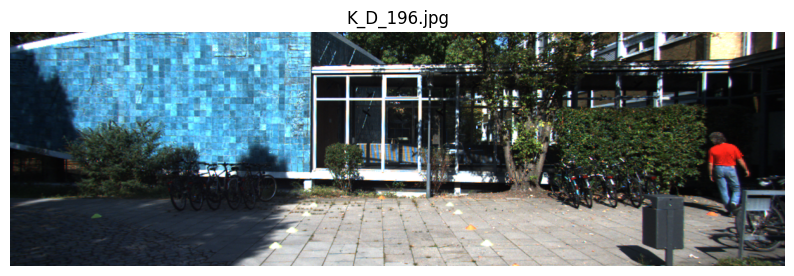

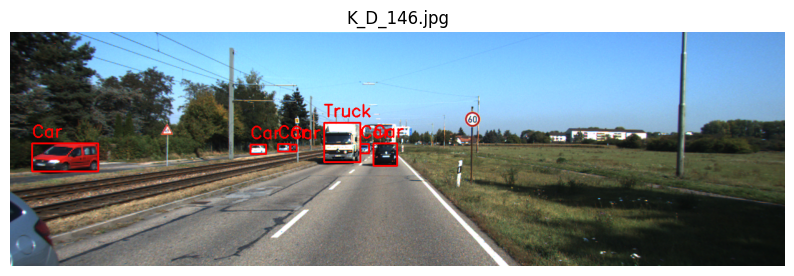

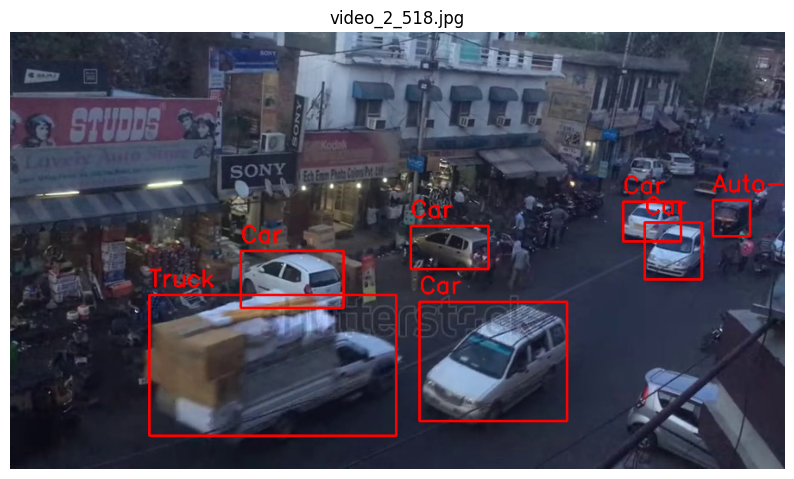

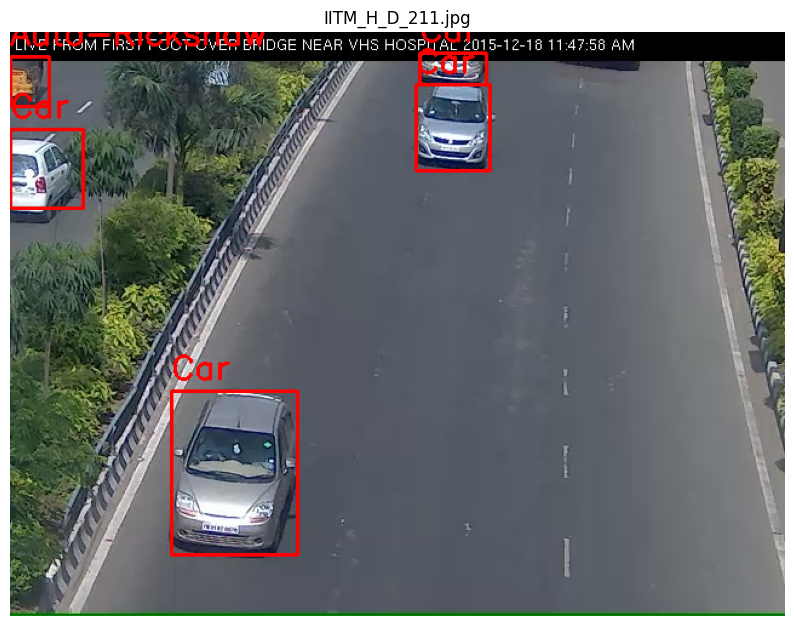

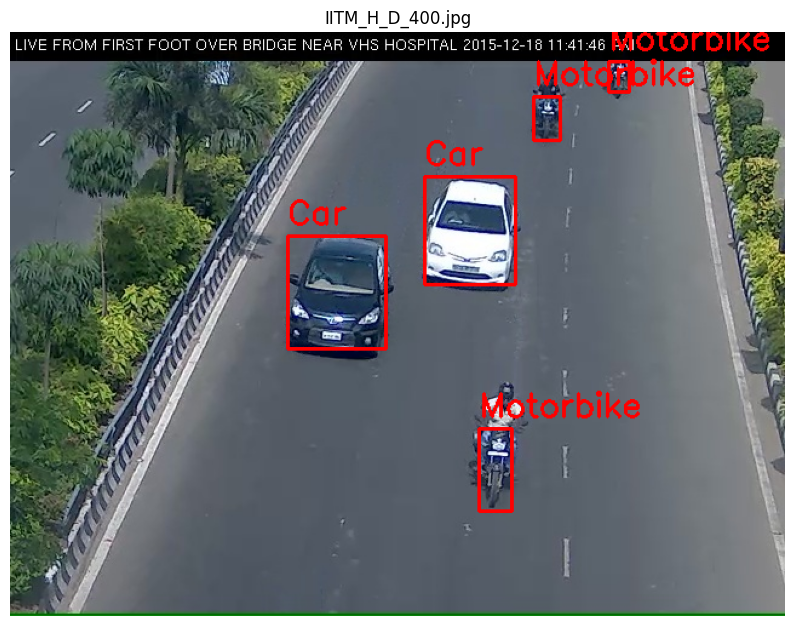

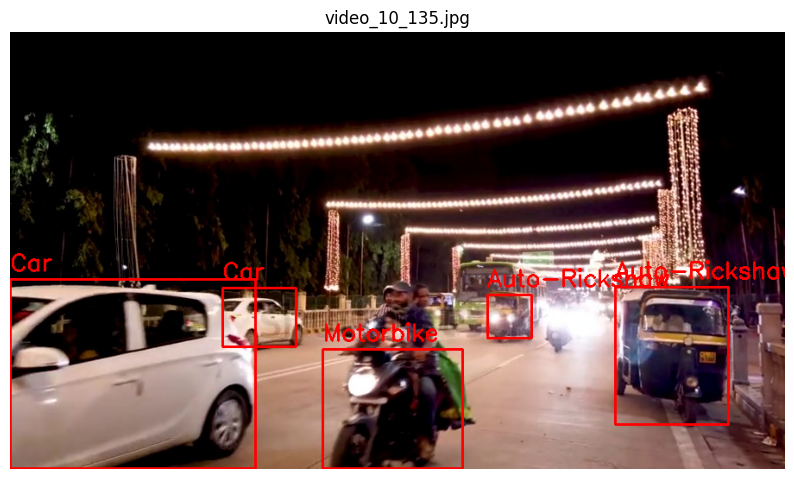

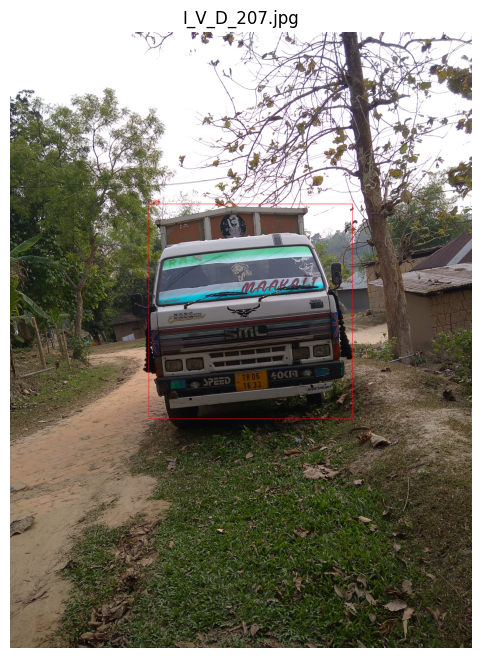

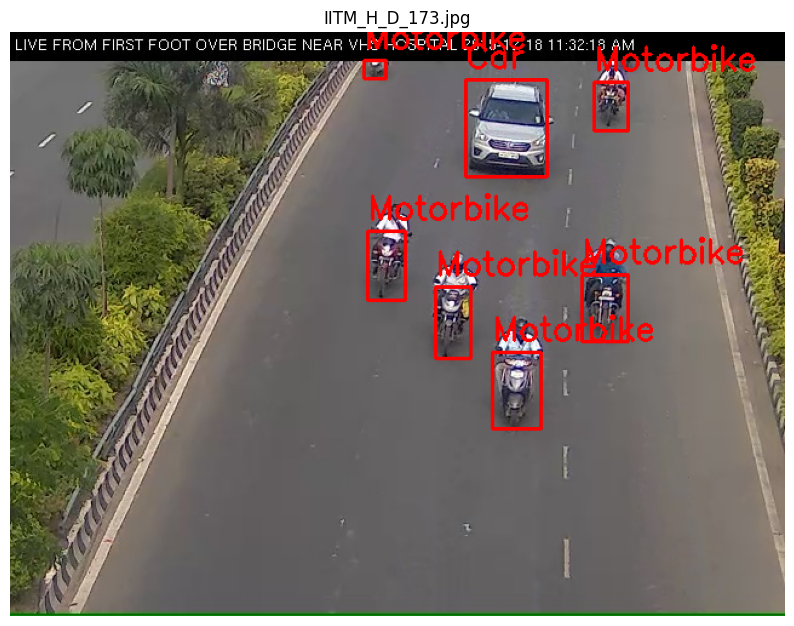

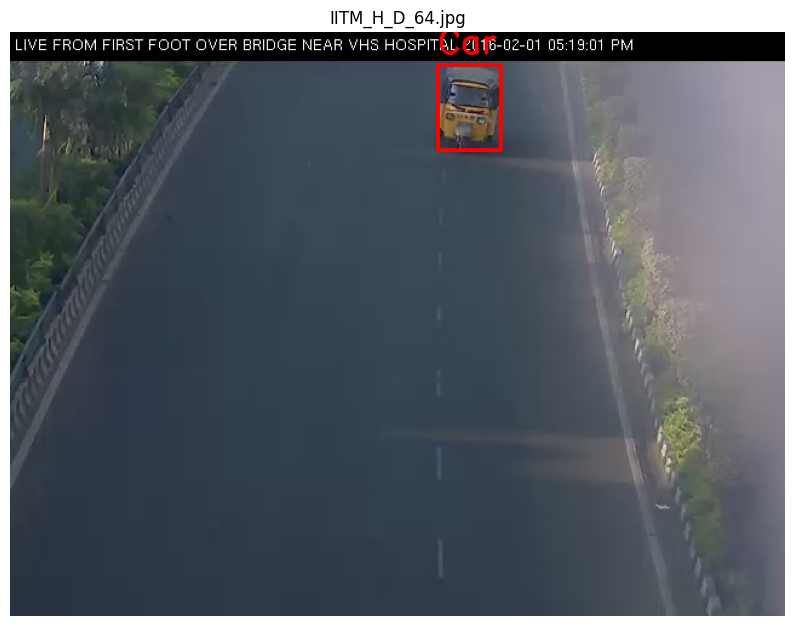

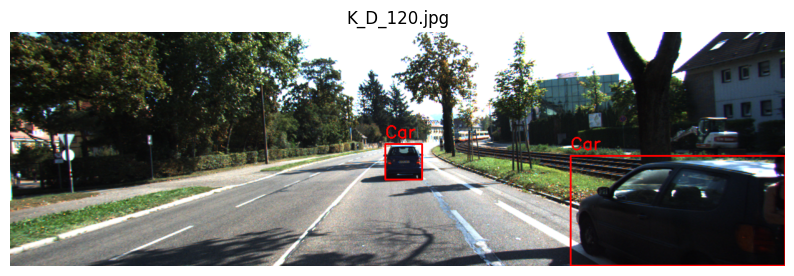

In [4]:


annotation_path = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"
image_path = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_Mix_Images"
class_file = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj.names"

with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

annotation_files = [f for f in os.listdir(annotation_path) if f.endswith('.txt')]

selected_files = random.sample(annotation_files, 10)

def yolo_to_pixel(x_center, y_center, w, h, img_width, img_height):
    x_min = int((x_center - w/2) * img_width)
    y_min = int((y_center - h/2) * img_height)
    x_max = int((x_center + w/2) * img_width)
    y_max = int((y_center + h/2) * img_height)
    return x_min, y_min, x_max, y_max

for anno_file in selected_files:
    image_file = os.path.splitext(anno_file)[0] + '.jpg'
    image_full_path = os.path.join(image_path, image_file)
    anno_full_path = os.path.join(annotation_path, anno_file)
    
    img = cv2.imread(image_full_path)
    if img is None:
        print(f"Could not load image: {image_file}")
        continue
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_height, img_width = img.shape[:2]
    
    with open(anno_full_path, 'r') as f:
        annotations = f.readlines()
    
    for anno in annotations:
        class_id, x_center, y_center, width, height = map(float, anno.strip().split())
        class_id = int(class_id)
        
        x_min, y_min, x_max, y_max = yolo_to_pixel(x_center, y_center, width, height, img_width, img_height)
        
        cv2.rectangle(img_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        
        label = class_names[class_id]
        cv2.putText(img_rgb, label, (x_min, y_min-10), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.9, (255, 0, 0), 2)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(image_file)
    plt.show()
